# Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [7]:
udf_raw = pd.read_csv("uniwersal_results.csv", sep=';', header=None, names=["algo", "threads", "t", "t1", "t2", "t3", "t4"])
udf_raw.head()

,algo,threads,t,t1,t2,t3,t4
0,sort_2,2,1.817408,0.044978,0.735976,0.954674,0.081692
1,sort_2,2,1.817840,0.045133,0.738687,0.952506,0.081428
2,sort_2,2,1.804927,0.044937,0.726126,0.952233,0.081538
3,sort_2,2,1.819119,0.044985,0.741842,0.950891,0.081289
4,sort_2,2,1.824612,0.044888,0.743136,0.955235,0.081253


In [8]:
bdf_raw = pd.read_csv("bucket_variable_results.csv", sep=';', header=None, names=["algo", "buckets", "t", "t1", "t2", "t3", "t4"])
bdf_raw.head()

,algo,buckets,t,t1,t2,t3,t4
0,sort_4,7000,2.786250,0.089059,0.624826,1.965102,0.107250
1,sort_4,7000,2.771926,0.088857,0.613627,1.962349,0.107084
2,sort_4,7000,2.783871,0.088745,0.614440,1.973342,0.107336
3,sort_4,7000,2.788400,0.088762,0.617355,1.975112,0.107162
4,sort_4,7000,2.771167,0.088681,0.615746,1.959673,0.107057


In [48]:
odf_raw = pd.read_csv("sort24_cmp_results.csv", sep=';', header=None, names=["algo", "threads", "buckets", "t", "t1", "t2", "t3", "t4"])
odf_raw.head()

,algo,threads,buckets,t,t1,t2,t3,t4
0,sort_2,5,35000,1.217734,0.017863,0.354119,0.320364,0.525163
1,sort_2,5,35000,1.211776,0.017858,0.349642,0.319514,0.524589
2,sort_2,5,35000,1.211190,0.017908,0.347599,0.321356,0.524153
3,sort_2,5,35000,1.209160,0.017922,0.346400,0.320362,0.524227
4,sort_2,5,35000,1.207477,0.017949,0.345343,0.320230,0.523721


In [9]:
udf = udf_raw.groupby(['algo', 'threads']).agg(
    t_mean=('t', 'mean'), t_std=('t', 'std'),
    t1_mean=('t1', 'mean'), t1_std=('t1', 'std'),
    t2_mean=('t2', 'mean'), t2_std=('t2', 'std'),
    t3_mean=('t3', 'mean'), t3_std=('t3', 'std'),
    t4_mean=('t4', 'mean'), t4_std=('t4', 'std')
).reset_index()

udf.head()

,algo,threads,t_mean,t_std,t1_mean,t1_std,t2_mean,t2_std,t3_mean,t3_std,t4_mean,t4_std
0,sort_2,1,2.845361,0.011017,0.089103,0.000120,0.704126,0.009303,1.927204,0.005320,0.124916,0.000077
1,sort_2,2,1.939714,0.309255,0.045004,0.000138,0.861588,0.312720,0.951343,0.004975,0.081690,0.000678
2,sort_2,3,1.262839,0.004610,0.029622,0.000098,0.532789,0.003124,0.642240,0.002880,0.058084,0.000179
3,sort_2,4,0.990199,0.005359,0.022256,0.000027,0.440472,0.004839,0.482174,0.001562,0.045178,0.000074
4,sort_2,5,0.795335,0.004698,0.018081,0.000036,0.354581,0.004214,0.385580,0.000983,0.036951,0.000028


In [12]:
bdf = bdf_raw.groupby(['algo', 'buckets']).agg(
    t_mean=('t', 'mean'), t_std=('t', 'std'),
    t1_mean=('t1', 'mean'), t1_std=('t1', 'std'),
    t2_mean=('t2', 'mean'), t2_std=('t2', 'std'),
    t3_mean=('t3', 'mean'), t3_std=('t3', 'std'),
    t4_mean=('t4', 'mean'), t4_std=('t4', 'std')
).reset_index()

bdf.head()

,algo,buckets,t_mean,t_std,t1_mean,t1_std,t2_mean,t2_std,t3_mean,t3_std,t4_mean,t4_std
0,sort_2,1,4.891789,0.085933,0.089987,0.001109,0.447144,0.026985,4.304412,0.075785,0.050227,0.000935
1,sort_2,100,3.707041,0.031435,0.090349,0.000655,0.511970,0.014553,3.049320,0.030042,0.055380,0.022540
2,sort_2,1000,3.190472,0.018703,0.090526,0.000585,0.563866,0.006610,2.484332,0.018981,0.051708,0.000405
3,sort_2,5000,2.931503,0.054568,0.090814,0.000732,0.669995,0.055538,2.089966,0.010733,0.080709,0.000696
4,sort_2,6000,2.939576,0.052008,0.094502,0.017731,0.691444,0.033505,2.059967,0.016933,0.093643,0.000715


In [52]:
odf = odf_raw.groupby(['algo', 'threads', 'buckets']).agg(
    t_mean=('t', 'mean'), t_std=('t', 'std'),
    t1_mean=('t1', 'mean'), t1_std=('t1', 'std'),
    t2_mean=('t2', 'mean'), t2_std=('t2', 'std'),
    t3_mean=('t3', 'mean'), t3_std=('t3', 'std'),
    t4_mean=('t4', 'mean'), t4_std=('t4', 'std')
).reset_index()

odf.head()

,algo,threads,buckets,t_mean,t_std,t1_mean,t1_std,t2_mean,t2_std,t3_mean,t3_std,t4_mean,t4_std
0,sort_2,1,7000,2.847739,0.017612,0.088363,0.000382,0.674836,0.008740,1.977479,0.012222,0.107048,0.000516
1,sort_2,2,14000,1.962113,0.122540,0.044573,0.000332,0.827203,0.117717,0.893846,0.005837,0.196400,0.001560
2,sort_2,3,21000,1.626850,0.282908,0.029965,0.000487,0.719708,0.276756,0.573996,0.004578,0.303043,0.005861
3,sort_2,4,28000,1.337060,0.026625,0.022574,0.000145,0.473676,0.021016,0.416251,0.002508,0.424354,0.005253
4,sort_2,5,35000,1.208362,0.008653,0.017911,0.000048,0.344227,0.003338,0.322036,0.007792,0.523976,0.000460


# Execution time

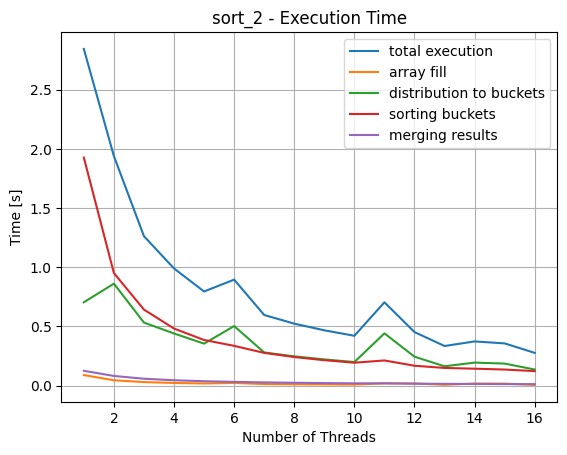

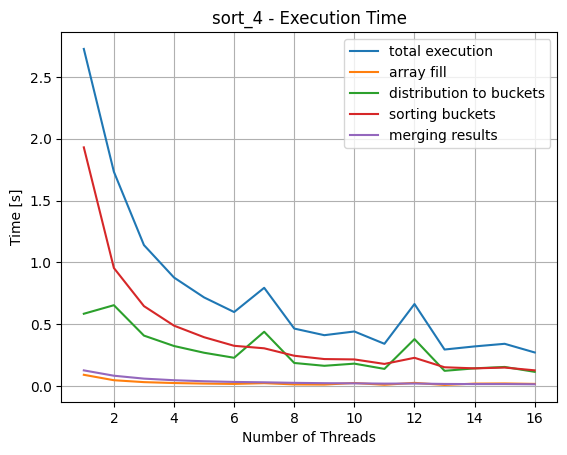

In [15]:
for series in udf.groupby(["algo"]):
    series_df = series[1]
    series_nm = series[0][0]
    
    plt.plot(series_df["threads"], series_df["t_mean"], label="total execution")
    plt.plot(series_df["threads"], series_df["t1_mean"], label="array fill")
    plt.plot(series_df["threads"], series_df["t2_mean"], label="distribution to buckets")
    plt.plot(series_df["threads"], series_df["t3_mean"], label="sorting buckets")
    plt.plot(series_df["threads"], series_df["t4_mean"], label="merging results")
    
    plt.title(f"{series_nm} - Execution Time")
    plt.legend()
    plt.xlabel("Number of Threads")
    plt.ylabel("Time [s]")
    plt.grid()
    plt.show()

# Speedup

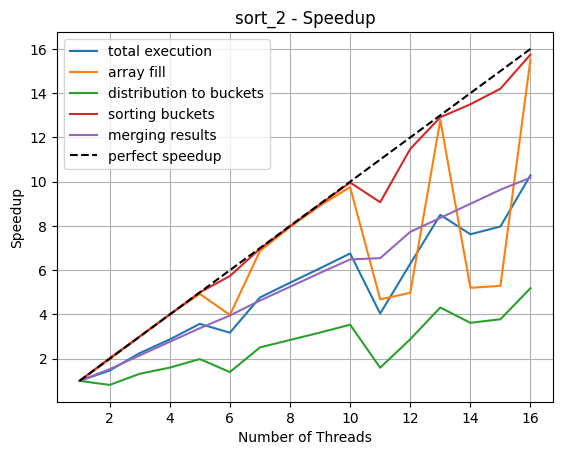

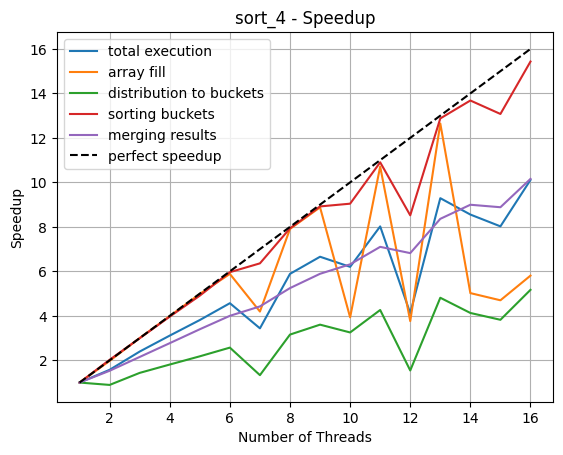

In [59]:
for series in udf.groupby(["algo"]):
    series_df = series[1]
    series_nm = series[0][0]
    
    T1 = series_df[series_df["threads"] == 1]["t_mean"].values[0]
    T11 = series_df[series_df["threads"] == 1]["t1_mean"].values[0]
    T12 = series_df[series_df["threads"] == 1]["t2_mean"].values[0]
    T13 = series_df[series_df["threads"] == 1]["t3_mean"].values[0]
    T14 = series_df[series_df["threads"] == 1]["t4_mean"].values[0]
    
    plt.plot(series_df["threads"], T1/series_df["t_mean"], label="total execution")
    plt.plot(series_df["threads"], T11/series_df["t1_mean"], label="array fill")
    plt.plot(series_df["threads"], T12/series_df["t2_mean"], label="distribution to buckets")
    plt.plot(series_df["threads"], T13/series_df["t3_mean"], label="sorting buckets")
    plt.plot(series_df["threads"], T14/series_df["t4_mean"], label="merging results")
    
    perfect_speedup = series_df["threads"].values
    plt.plot(perfect_speedup, perfect_speedup, label="perfect speedup", linestyle='--', color='black')
    
    plt.title(f"{series_nm} - Speedup")
    plt.legend()
    plt.xlabel("Number of Threads")
    plt.grid()
    plt.ylabel("Speedup")
    plt.show()

# Buckets analysis

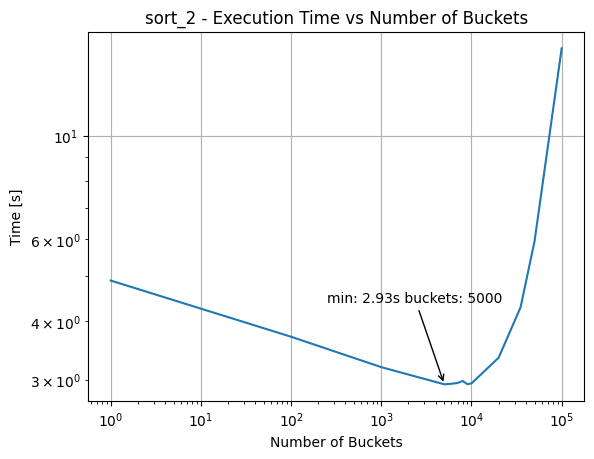

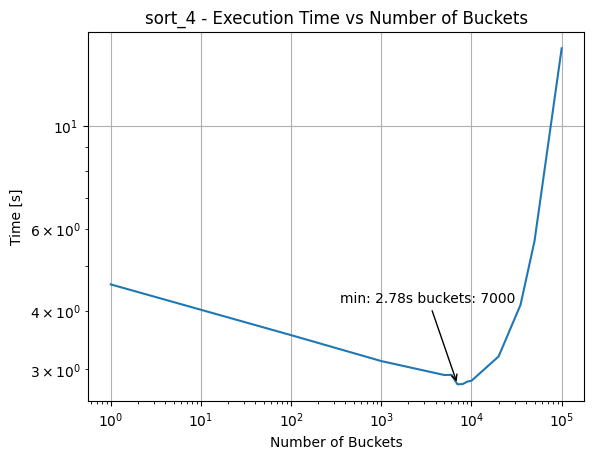

In [45]:
for series in bdf.groupby(["algo"]):
    series_df = series[1]
    series_nm = series[0][0]
    
    plt.plot(series_df["buckets"], series_df["t_mean"], label="total execution")
    # plt.plot(series_df["buckets"], series_df["t1_mean"], label="array fill")
    # plt.plot(series_df["buckets"], series_df["t2_mean"], label="distribution to buckets")
    # plt.plot(series_df["buckets"], series_df["t3_mean"], label="sorting buckets")
    # plt.plot(series_df["buckets"], series_df["t4_mean"], label="merging results")
    
    plt.title(f"{series_nm} - Execution Time vs Number of Buckets")
    # plt.legend()
    plt.xlabel("Number of Buckets")
    plt.ylabel("Time [s]")
    plt.yscale("log")
    plt.xscale("log")
    plt.grid()

    min_index = series_df["t_mean"].idxmin()
    min_value = series_df["t_mean"].min()
    min_buckets = series_df["buckets"].iloc[min_index-13]
    plt.annotate(f"min: {min_value:.2f}s buckets: {min_buckets}", xy=(min_buckets, min_value), xytext=(min_buckets*0.05, min_value*1.5),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
    
    plt.show()

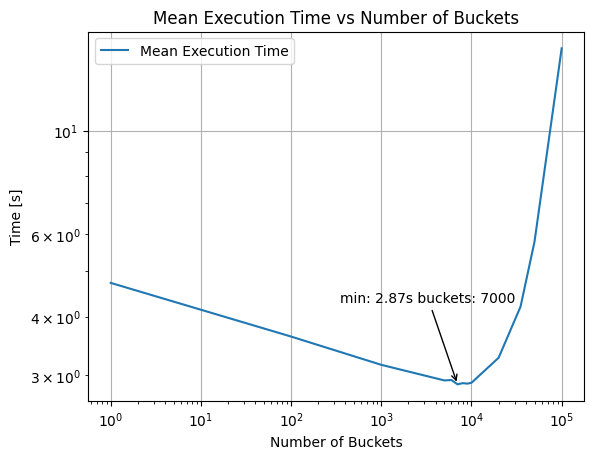

In [44]:
# Calculate the mean execution time for both algorithms
mean_bdf = bdf.groupby("buckets").agg(t_mean=("t_mean", "mean")).reset_index()

# Plot the mean execution time
plt.plot(mean_bdf["buckets"], mean_bdf["t_mean"], label="Mean Execution Time")

# Find the minimum value and its corresponding bucket
min_index = mean_bdf["t_mean"].idxmin()
min_value = mean_bdf["t_mean"].min()
min_buckets = mean_bdf["buckets"].iloc[min_index]

# Annotate the minimum value
plt.annotate(f"min: {min_value:.2f}s buckets: {min_buckets}", 
             xy=(min_buckets, min_value), 
             xytext=(min_buckets * 0.05, min_value * 1.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.title("Mean Execution Time vs Number of Buckets")
plt.xlabel("Number of Buckets")
plt.ylabel("Time [s]")
plt.yscale("log")
plt.xscale("log")
plt.grid()
plt.legend()
plt.show()

# Sort 2/4 oriented analysis

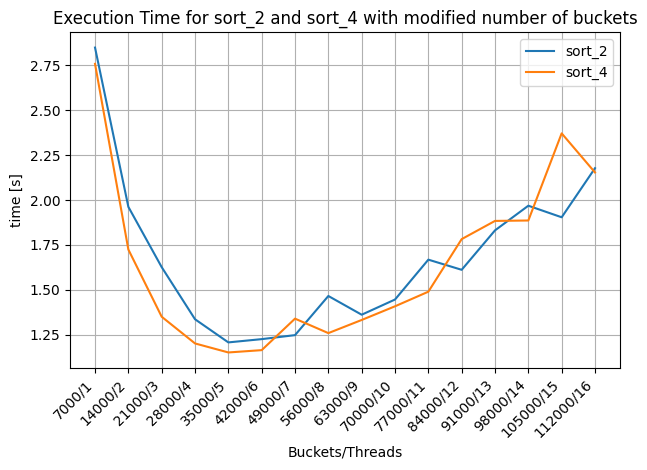

In [71]:
for series in odf.groupby("algo"):
    series_df = series[1]
    series_nm = series[0]
    
    # Create a combined x-axis label
    x_labels = [f"{buckets}/{threads}" for buckets, threads in zip(series_df["buckets"], series_df["threads"])]
    
    plt.plot(x_labels, series_df["t_mean"], label=f"{series_nm}")

plt.title("Execution Time for sort_2 and sort_4 with modified number of buckets")
plt.xlabel("Buckets/Threads")
plt.ylabel("time [s]")
plt.xticks(rotation=45, ha="right")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

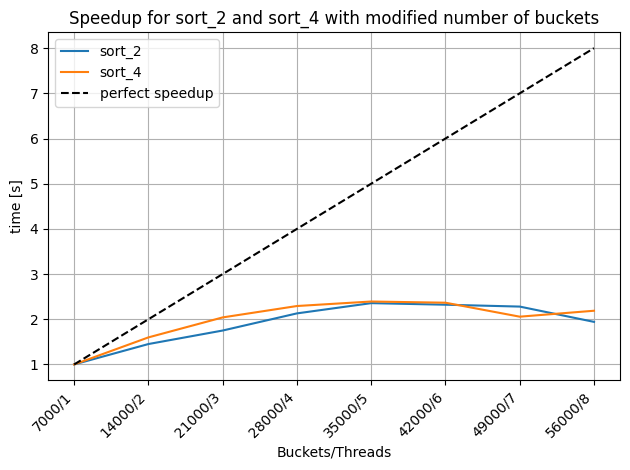

In [72]:
for series in odf.groupby("algo"):
    series_df = series[1][series[1]["threads"] <= 8]
    series_nm = series[0]
    
    # Create a combined x-axis label
    x_labels = [f"{buckets}/{threads}" for buckets, threads in zip(series_df["buckets"], series_df["threads"])]
    
    T1 = series_df[series_df["threads"] == 1]["t_mean"].values[0]
    
    plt.plot(x_labels, T1/series_df["t_mean"], label=f"{series_nm}")
    

X = np.arange(0, len(x_labels))
Y = np.arange(1, len(x_labels)+1)
plt.plot(X, Y, label="perfect speedup", linestyle='--', color='black')

plt.title("Speedup for sort_2 and sort_4 with modified number of buckets")
plt.xlabel("Buckets/Threads")
plt.ylabel("time [s]")
plt.xticks(rotation=45, ha="right")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()